Código ALGAS adaptado para o tema do Grupo 04 - Agronegócio - Cultura de Soja

Aluno: Renan Moreira Lima
RA: 02211056

Sensor de medição de fertilidade do solo (NPK - Nitrogênio, Fósforo e Potássio)

Cenário 1 - 672 dados gerados, pensando em uma semana de coleta, a cada 15 minutos.
Cenário 2 - 2.688 dados gerados, pensando em um mês de coleta, a cada 15 minutos.
Cenário 3 - 32.256 dados gerados, pensando em um ano de coleta, a cada 15 minutos.

In [3]:
# imports necessários
import datetime
from sys import getsizeof
import matplotlib.pyplot as plt
import random
import mysql.connector
import dis

In [5]:
dados_n = [];
dados_p = [];
dados_k = [];
dados_nivel_fertil = [];
dados_mem = [];
dados_tempo = [];


def gerar_dados(min, max, step, nivel_fertilidade):

    conexao = mysql.connector.connect(
    host= "localhost",
    user= "solo",
    password= "soloFertil2023#",
    database= "soy_fertility"
    )

    nivel_fertil = '';

    inicio_tempo = datetime.datetime.now(); 
    
    # Cria o cursor
    cursor = conexao.cursor();

    mem = 0;
    for dado in range(min, max+1, step):

        if nivel_fertilidade == 4:
            dado_n = random.randint(60, 91);
            dado_p = random.randint(5, 11);
            dado_k = random.randint(50, 101);
            nivel_fertil = 'Falta de fertilizantes';
        elif nivel_fertilidade == 3:
            dado_n = random.randint(90, 121);
            dado_p = random.randint(10, 21);
            dado_k = random.randint(100, 151);
            nivel_fertil = 'Médio de fertilidade';
        elif nivel_fertilidade == 2:
            dado_n = random.randint(120, 151);
            dado_p = random.randint(20, 41);
            dado_k = random.randint(150, 201);
            nivel_fertil = 'Média a alta fertilidade';
        else:
            dado_n = random.randint(150, 251);
            dado_p = random.randint(40, 61);
            dado_k = random.randint(200, 301);
            nivel_fertil = 'Fértil';

        dados_n.append(dado_n);
        dados_p.append(dado_p);
        dados_k.append(dado_k);
        dados_nivel_fertil.append(nivel_fertil);

        #transação
        dados_n.sort();
        dados_p.sort();
        dados_k.sort();

        mem = getsizeof(dados_n + dados_p + dados_k) * 1024;
        dados_mem.append(mem);
        final_tempo = datetime.datetime.now();
        dado_tempo = (final_tempo - inicio_tempo).total_seconds();
        dados_tempo.append(dado_tempo);

        sql = "INSERT INTO solo_fertil values(null, %s, %s, %s, %s, %s, %s);"

        values = (dado_n, dado_p, dado_k, nivel_fertil, dado_tempo, mem);

        cursor.execute(sql, values);
        
        conexao.commit();


    cursor.close();
    conexao.close();
    # print(dados_n)
    # print(dados_p)
    # print(dados_k)
    # print(dados_nivel_fertil)
    # print(dados_tempo)
    # print(dados_mem)

#fim 



  1           0 LOAD_NAME                0 (dis)
              2 LOAD_METHOD              0 (dis)
    -->       4 LOAD_NAME                1 (gerar_dados)
              6 LOAD_CONST               0 (1)
              8 LOAD_CONST               1 (672)
             10 LOAD_CONST               0 (1)
             12 LOAD_CONST               2 (3)
             14 CALL_FUNCTION            4
             16 CALL_METHOD              1
             18 POP_TOP
             20 LOAD_CONST               3 (None)
             22 RETURN_VALUE


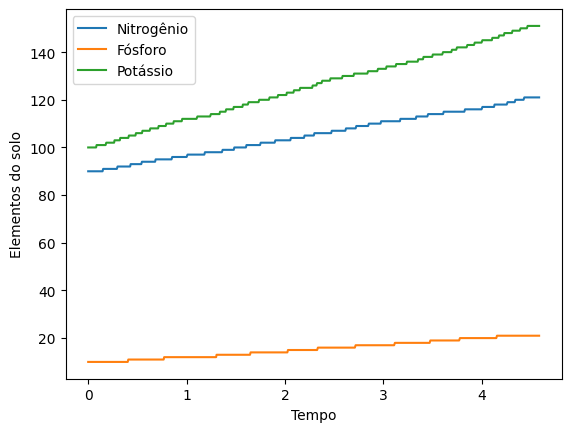

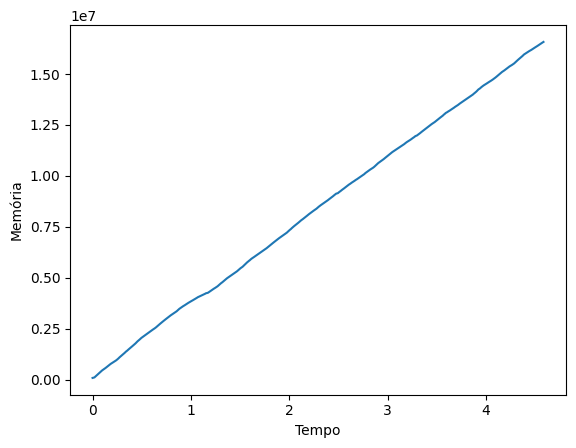

In [6]:
dis.dis(gerar_dados(1, 672, 1, 3));
plt.plot(dados_tempo, dados_n, label='Nitrogênio');
plt.plot(dados_tempo, dados_p, label='Fósforo');
plt.plot(dados_tempo, dados_k, label='Potássio');
plt.xlabel('Tempo');
plt.ylabel('Elementos do solo')
plt.legend(loc='upper left')
plt.show();

plt.plot(dados_tempo, dados_mem);
plt.xlabel('Tempo');
plt.ylabel('Memória');
plt.show();

  1           0 LOAD_NAME                0 (dis)
              2 LOAD_METHOD              0 (dis)
    -->       4 LOAD_NAME                1 (gerar_dados)
              6 LOAD_CONST               0 (1)
              8 LOAD_CONST               1 (672)
             10 LOAD_CONST               0 (1)
             12 LOAD_CONST               2 (3)
             14 CALL_FUNCTION            4
             16 CALL_METHOD              1
             18 POP_TOP
             20 LOAD_CONST               3 (None)
             22 RETURN_VALUE


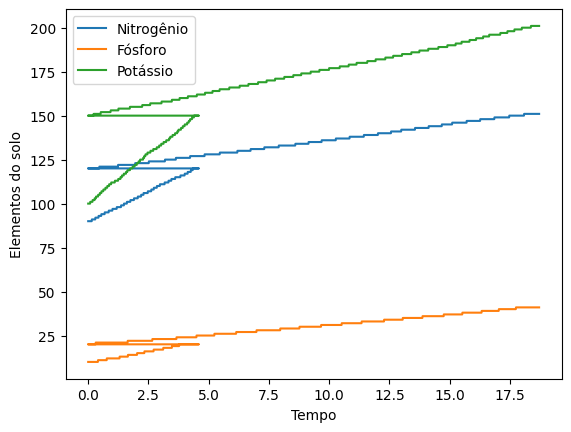

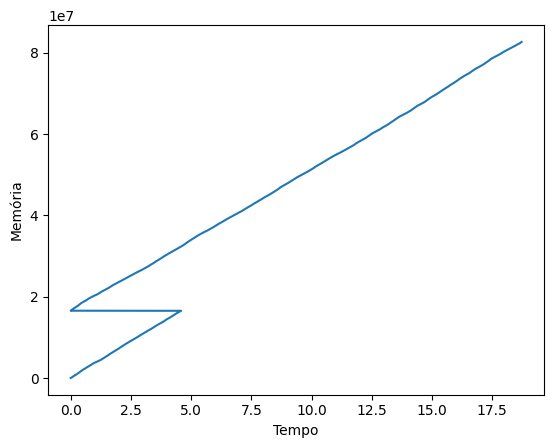

In [7]:
dis.dis(gerar_dados(1, 2688, 1, 2));
plt.plot(dados_tempo, dados_n, label='Nitrogênio');
plt.plot(dados_tempo, dados_p, label='Fósforo');
plt.plot(dados_tempo, dados_k, label='Potássio');
plt.xlabel('Tempo');
plt.ylabel('Elementos do solo')
plt.legend(loc='upper left')
plt.show();

plt.plot(dados_tempo, dados_mem);
plt.xlabel('Tempo');
plt.ylabel('Memória');
plt.show();

  1           0 LOAD_NAME                0 (dis)
              2 LOAD_METHOD              0 (dis)
    -->       4 LOAD_NAME                1 (gerar_dados)
              6 LOAD_CONST               0 (1)
              8 LOAD_CONST               1 (672)
             10 LOAD_CONST               0 (1)
             12 LOAD_CONST               2 (3)
             14 CALL_FUNCTION            4
             16 CALL_METHOD              1
             18 POP_TOP
             20 LOAD_CONST               3 (None)
             22 RETURN_VALUE


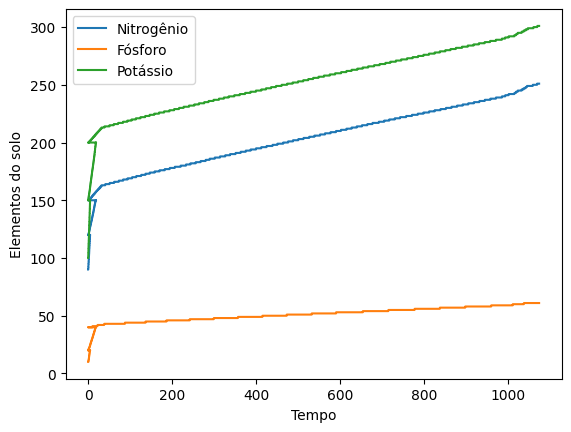

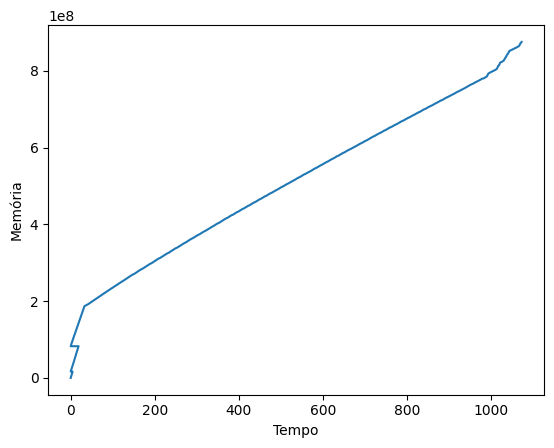

In [8]:
dis.dis(gerar_dados(1, 32256, 1, 1));
plt.plot(dados_tempo, dados_n, label='Nitrogênio');
plt.plot(dados_tempo, dados_p, label='Fósforo');
plt.plot(dados_tempo, dados_k, label='Potássio');
plt.xlabel('Tempo');
plt.ylabel('Elementos do solo')
plt.legend(loc='upper left')
plt.show();

plt.plot(dados_tempo, dados_mem);
plt.xlabel('Tempo');
plt.ylabel('Memória');
plt.show();